In [12]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans

%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid')
pd.set_option('display.width', 1500)
pd.set_option('display.max_columns', 100)

import tensorflow as tf

In [2]:
master = pd.read_csv('data/crimes_nat_tinker.csv')
master.drop(['Unnamed: 0','Unnamed: 0.1','SHOOTING'],axis=1,inplace=True)
master = pd.get_dummies(master, columns=['DAY_OF_WEEK'])
master.neighborhood_avg = np.log(master.neighborhood_avg)
master.closest_property_value = np.log(master.closest_property_value)
master.head()

,Lat,Long,MONTH,HOUR,TAVG,PRCP,SNOW,closest_property_value,neighborhood_avg,lamp_min_dist,lamp_density,category,police_min_dist,police_density,hospital_min_dist,hospital_density,school_min_dist,school_density,DAY_OF_WEEK_Friday,DAY_OF_WEEK_Monday,DAY_OF_WEEK_Saturday,DAY_OF_WEEK_Sunday,DAY_OF_WEEK_Thursday,DAY_OF_WEEK_Tuesday,DAY_OF_WEEK_Wednesday
0,42.259518,-71.121563,10,9,59.0,0.00,0.0,13.025852,12.996051,0.001234,563.0,theft,0.004067,1.0,0.041388,0.0,0.004665,4.0,0,0,0,1,0,0,0
1,42.262092,-71.116710,10,20,56.0,0.01,0.0,13.201729,13.023400,0.000539,531.0,theft,0.009414,1.0,0.036018,0.0,0.001244,3.0,0,0,1,0,0,0,0
2,42.352375,-71.135096,10,15,56.0,0.01,0.0,12.468052,13.287047,0.000167,1272.0,theft,0.015767,0.0,0.010692,0.0,0.002624,3.0,0,0,1,0,0,0,0
3,42.349476,-71.076402,10,4,56.0,0.01,0.0,13.106234,14.326388,0.000074,4461.0,theft,0.012329,0.0,0.012304,0.0,0.001918,6.0,0,0,1,0,0,0,0
4,42.381846,-71.066551,10,8,71.0,0.22,0.0,13.637460,13.313802,0.000108,2672.0,theft,0.011801,0.0,0.016170,0.0,0.002848,3.0,0,0,0,0,0,0,1


In [3]:
X, y = master.drop(['category'], axis=1), master['category']

In [4]:
def test_rf(best_depth):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    model = RandomForestClassifier(n_estimators=int(X_train.shape[1]/2), max_depth=best_depth)
    model.fit(X_train, y_train)

    #Predict
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    #Perfromance Evaluation
    acc_random_forest_training = accuracy_score(y_train, y_pred_train)*100
    acc_random_forest_testing = accuracy_score(y_test, y_pred_test)*100

    print("Random Forest: Accuracy, Training Set : {:0.2f}%".format(acc_random_forest_training))
    print("Random Forest: Accuracy, Testing Set :  {:0.2f}%".format(acc_random_forest_testing))
    
    return(model)

In [10]:
model = test_rf(15)

Random Forest: Accuracy, Training Set : 47.96%
Random Forest: Accuracy, Testing Set :  28.20%


In [6]:
test_rf(10);

Random Forest: Accuracy, Training Set : 28.13%
Random Forest: Accuracy, Testing Set :  25.09%


In [7]:
test_rf(20);

Random Forest: Accuracy, Training Set : 80.03%
Random Forest: Accuracy, Testing Set :  27.59%


In [8]:
41867 / sum(master.category.value_counts())

0.17008112642641546

AttributeError: 'NoneType' object has no attribute 'feature_importances_'

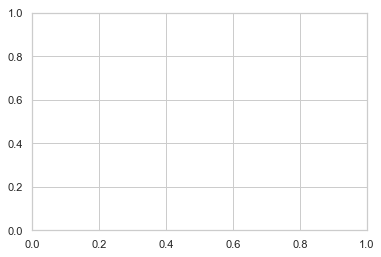

In [11]:
fig, ax = plt.subplots()
feat_import_tree20 = pd.Series(model.feature_importances_, index = X_train.columns)
feat_import_tree20.nlargest(10).plot(kind = 'barh', title = "Variable Importance Random Forest Model")

In [ ]:
master = master[list(master.columns[master.columns != 'category']) +['category']]
new = pd.DataFrame({'category':master.category.unique(),'number':[1,2,3,4,5,6,7,8,9,10,11]})
master = master.merge(new, on='category',how='left')
master.drop(['category'],axis=1,inplace=True)

In [49]:
X_train = master.iloc[:,0:-1]
y_train = master.iloc[:,-1]
X_train = X_train.astype(float)

In [30]:
# define infrastructure of model
model_overfit = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation='relu'), # first hidden layer with activation relu
    tf.keras.layers.Dense(100, activation='relu'), # second hidden layer with activation relu
    tf.keras.layers.Dense(100, activation='relu'), # third hidden layer with activation relu
    tf.keras.layers.Dense(11, activation='sigmoid') # output layer with activation sigmoid
])

In [72]:
# set up parameters for compiling
loss_fn   = tf.keras.losses.CategoricalHinge()
optimizer = tf.keras.optimizers.Adam()

In [73]:
# compile the model
model_overfit.compile(optimizer=optimizer,loss=loss_fn,metrics=['accuracy'])

In [74]:
# get appropriate X and y for training into numpy array format
X_train = np.array(X_train)
y_train = np.array(y_train)

In [75]:
# fit model with parameters from above 
history = model_overfit.fit(X_train, y_train, validation_split=0.3, batch_size=128, epochs=3, verbose=1)

Train on 172311 samples, validate on 73848 samples
Epoch 1/3
172311/172311 [==============================] - 5s 29us/sample - loss: 0.0000e+00 - accuracy: 0.9967 - val_loss: 0.0000e+00 - val_accuracy: 0.9967
Epoch 2/3
172311/172311 [==============================] - 4s 24us/sample - loss: 0.0000e+00 - accuracy: 0.9967 - val_loss: 0.0000e+00 - val_accuracy: 0.9967
Epoch 3/3
172311/172311 [==============================] - 4s 25us/sample - loss: 0.0000e+00 - accuracy: 0.9967 - val_loss: 0.0000e+00 - val_accuracy: 0.9967


In [76]:
# model_overfit.evaluate(X_train, y_train, verbose=0)
pd.Series(model_overfit.predict_classes(X_train)).value_counts()

0    245346
1       801
3        12
dtype: int64

In [66]:
pd.Series(y_train).value_counts()

1     41867
8     37742
4     33606
7     27298
2     23527
3     22040
9     22006
10    19463
5      9311
6      4972
11     4327
dtype: int64

KeyError: 'categorical_accuracy'

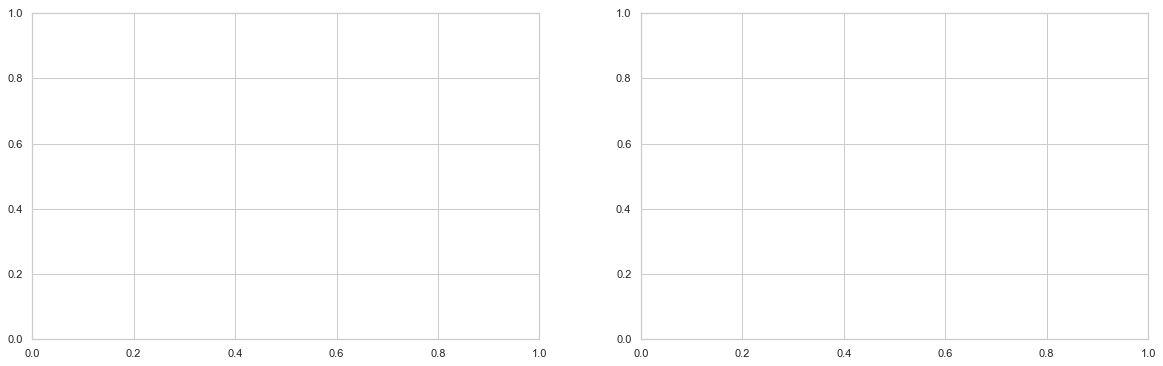

In [60]:
# plot accuracy and loss for the test set
fig, ax = plt.subplots(1,2, figsize=(20,6))

ax[0].plot(history.history['categorical_accuracy'])
ax[0].plot(history.history['val_categorical_accuracy'])
ax[0].set_title('Model accuracy')
ax[0].set_ylabel('accuracy')
ax[0].set_xlabel('epoch')
ax[0].legend(['train', 'val'], loc='best')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Model loss')
ax[1].set_ylabel('loss')
ax[1].set_xlabel('epoch')
ax[1].legend(['train', 'val'], loc='best')

plt.show()

{'loss': [145.20191114752765,
  139.59718035574022,
  139.5971803879738,
  139.59718037274254,
  139.59718011540528,
  139.5971803983346,
  139.59718038062383,
  139.5971805740253,
  139.59718027329666,
  139.59718047705888,
  139.59718054312,
  139.59718027621895,
  139.5971803908518,
  139.5971805218671,
  139.59718011013635,
  139.59718016185175,
  139.5971805222656,
  139.59718065336946,
  139.59718026240455,
  139.5971804619162],
 'categorical_accuracy': [0.98499227,
  0.9931113,
  0.9937323,
  0.993889,
  0.9941153,
  0.9944461,
  0.9947653,
  0.9950032,
  0.9951367,
  0.9954791,
  0.99571127,
  0.99585634,
  0.9959724,
  0.9960769,
  0.99626255,
  0.99619293,
  0.996338,
  0.99643666,
  0.9964715,
  0.9964947],
 'val_loss': [138.30415340932294,
  138.30415342254688,
  138.30415344899478,
  138.30415343577084,
  138.30415340932294,
  138.30415346221875,
  138.30415343577084,
  138.30415343577084,
  138.30415346221875,
  138.30415346221875,
  138.30415346221875,
  138.304153462218